# Monitoring de la VFC

1.	Évolution de la FC (fréquence cardiaque) :
- Comparez la moyenne de la fréquence cardiaque pour chaque jour/semaine.
- Représentez cela dans un graphique (évolution journalière ou hebdomadaire).

2.	Analyses temporelles et spectrales :
- Temporelles : Moyenne RR, SDNN (écart-type des intervalles RR), RMSSD.
- Spectrales : Low Frequency (LF), High Frequency (HF), ratio LF/HF, Welch, FFT


# I) Représentation graphique des paramètres les plus pertinents pour l'analyse temporelle de la variabilité de la fréquence cardiaque (VFC). 

Les enregistrement ont été fait en position allongé.

La variabilité de la Fréquence cardiaque est due au mode de contrôle du rythme cardiaque, influencée et modifiée par un système hormonal et par le système nerveux végétatif. Ainsi la fréquence cardiaque est la résultante de deux composantes : une activité sympathique cardioaccélératrice d’une part, et une activité parasympathique cardiodécélératrice, d’autre part. Ces deux composantes sont antagonistes et fonctionnent simultanément. 

Stress = système nerveux sympathique joue sur l'activité cardiaque = augmente la fréquence cardiaque 
No stress/Relaxation = Système nerveux parasympathique = baisse de la fréquence cardiaque. 

In [1]:
import pandas as pd

# Importer les données
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/Py_Data_HRV - Data.csv'
hrv_data = pd.read_csv(file_path)

# Afficher la strucutres 
hrv_data.head()


,Date,28/10/2024,29/10/2024,30/10/2024,31/10/2024,01/11/2024,02/11/2024,03/11/2024,04/11/2024,5/11/2024,...,15/11/2024,16/11/2024,17/11/2024,18/11/2024,19/11/2024,20/11/2024,21/11/2024,22/11/2024,23/11/2024,24/11/2024
0,Mean RR* (ms),978.0,900.00,921.00,942.00,945.00,812.00,875.00,987.00,964.00,...,962.00,890.00,1034.00,1144.00,956.00,1114.0,990.00,1091.00,1106.00,997.00
1,Mean HR* (bpm),61.0,67.00,65.00,64.00,64.00,74.00,69.00,61.00,62.00,...,62.00,67.00,58.00,52.00,63.00,54.0,61.00,55.00,54.00,60.00
2,SDNN (ms),182.5,167.10,192.60,212.20,214.60,148.70,184.50,228.10,692.60,...,283.00,178.20,233.00,251.10,158.50,137.8,198.90,153.80,163.80,166.60
3,RMSSD (ms),226.8,187.10,220.70,240.00,244.30,170.80,215.00,278.80,996.00,...,382.30,230.80,325.90,383.60,222.00,189.3,254.60,201.00,237.10,216.90
4,pNN50 (%),64.0,61.76,65.24,66.04,66.25,39.25,57.06,73.03,87.82,...,71.79,64.29,69.44,71.54,67.74,64.0,70.67,60.29,82.84,79.19


In [4]:
hrv_data.columns

Index(['Mean RR* (ms)', 'Mean HR* (bpm)', 'SDNN (ms)', 'RMSSD (ms)',
       'pNN50 (%)', 'Stress index'],
      dtype='object', name='Metric')

In [7]:
import matplotlib.pyplot as plt

# Nettoyer les noms de colonnes pour supprimer les espaces au début ou à la fin.
hrv_data.columns = hrv_data.columns.str.strip()

# Vérifier si la colone date existe la renomer métric si c'est le cas 
if 'Date' in hrv_data.columns:
    hrv_data = hrv_data.rename(columns={"Date": "Metric"}).set_index("Metric").T
else:
    # Handle cases where 'Date' might not be the column name
    print("La colonne 'Date' n'est pas trouvée. Assurez-vous que le fichier contient une colonne pour les métriques.")

# Convertir l'index en format datetime
try:
    hrv_data.index = pd.to_datetime(hrv_data.index, format='%d/%m/%Y', errors='coerce')
except Exception as e:
    print("Erreur lors de la conversion des dates :", e)

# Convertir les datas en données numéris pour les tracés 
hrv_data = hrv_data.apply(pd.to_numeric, errors='coerce')

# Vérifier la structure finale des données
print(hrv_data.head())


La colonne 'Date' n'est pas trouvée. Assurez-vous que le fichier contient une colonne pour les métriques.
Metric      Mean RR* (ms)  Mean HR* (bpm)  SDNN (ms)  RMSSD (ms)  pNN50 (%)  \
2024-10-28          978.0            61.0      182.5       226.8      64.00   
2024-10-29          900.0            67.0      167.1       187.1      61.76   
2024-10-30          921.0            65.0      192.6       220.7      65.24   
2024-10-31          942.0            64.0      212.2       240.0      66.04   
2024-11-01          945.0            64.0      214.6       244.3      66.25   

Metric      Stress index  
2024-10-28           2.6  
2024-10-29           4.2  
2024-10-30           3.6  
2024-10-31           2.9  
2024-11-01           2.8  


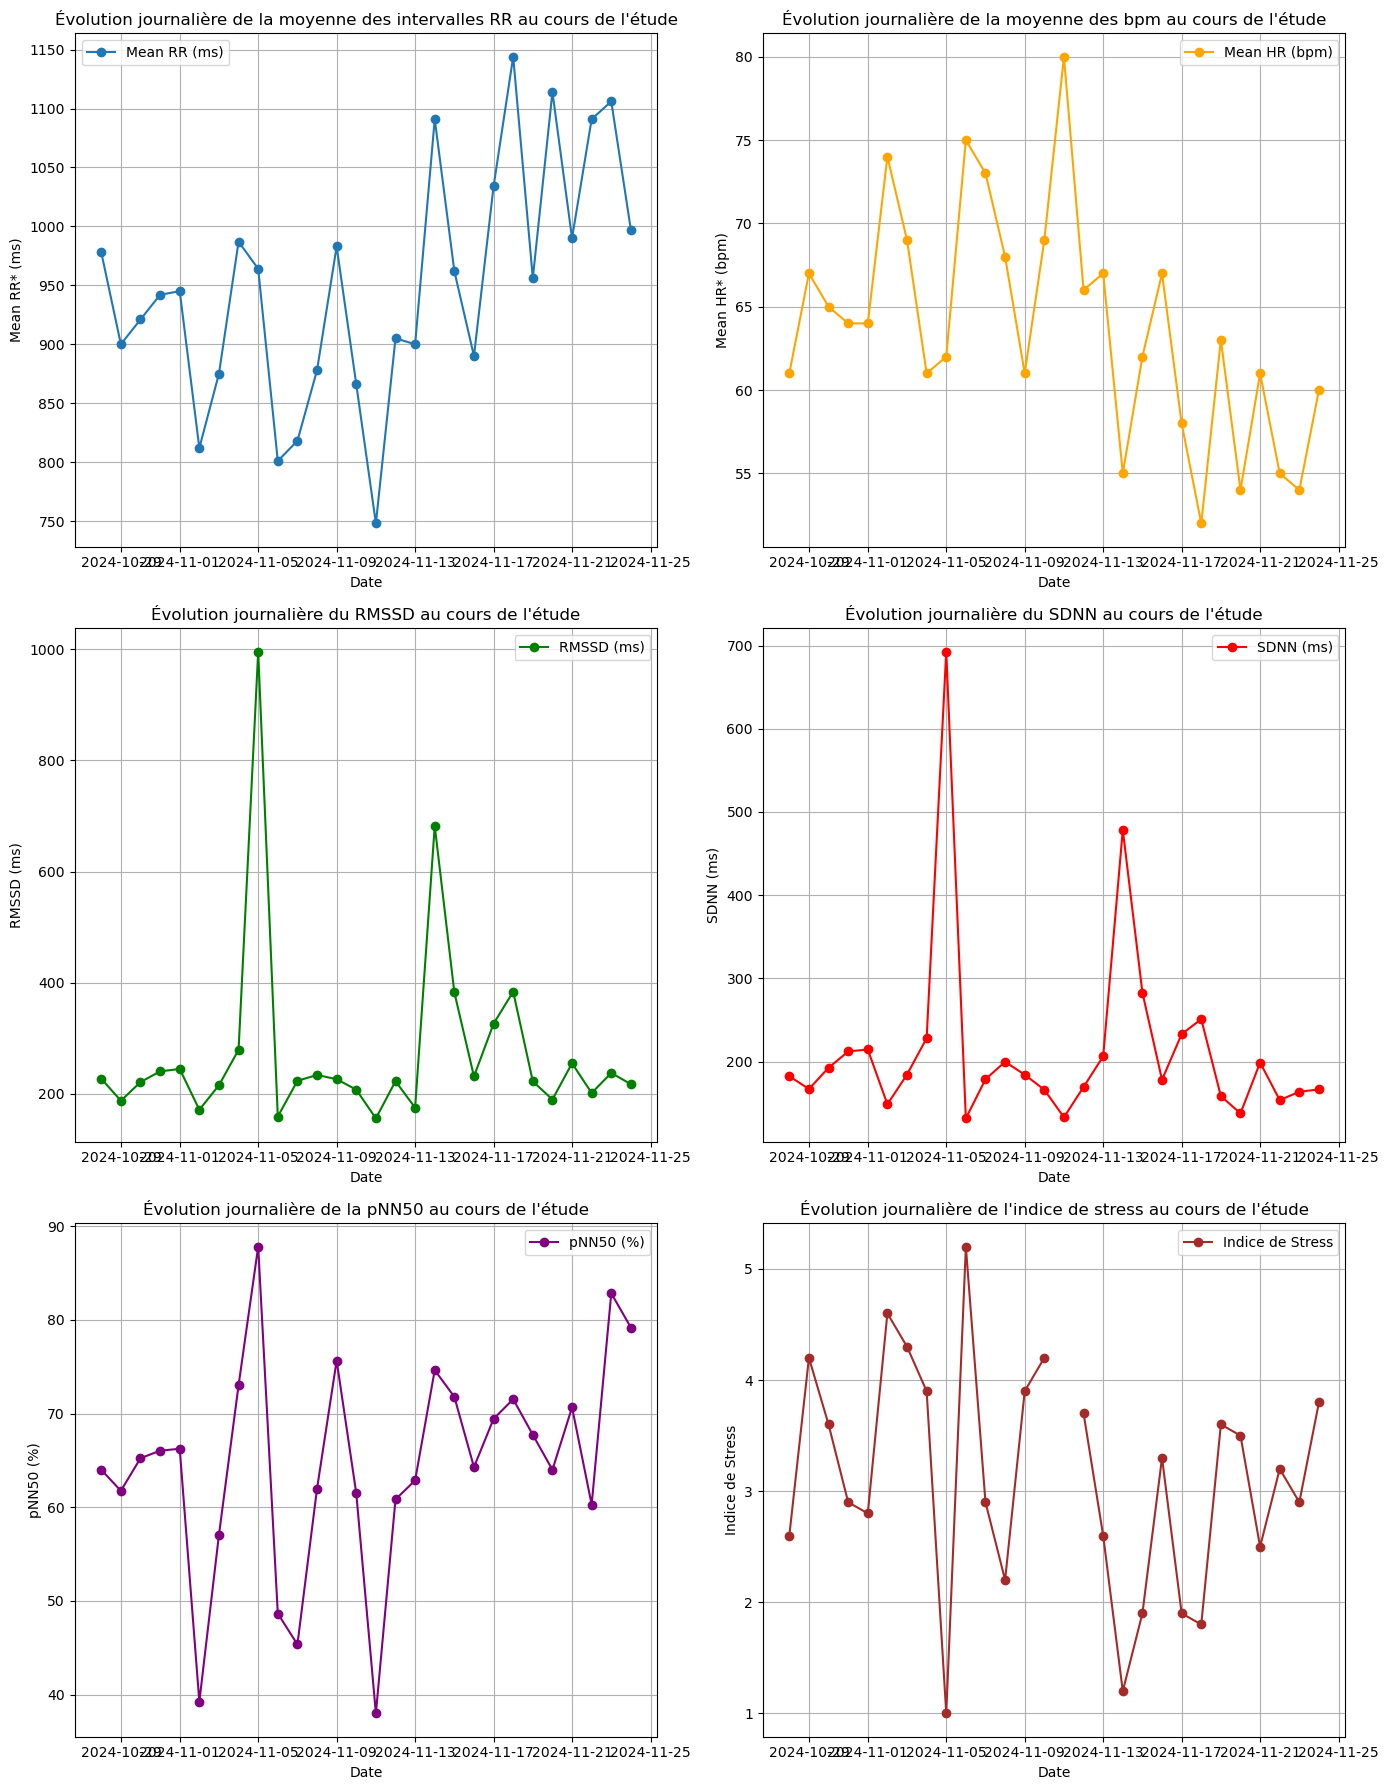

In [13]:
# Extraire les données du tableau
mean_rr = hrv_data['Mean RR* (ms)']
mean_hr = hrv_data['Mean HR* (bpm)']
rmssd = hrv_data['RMSSD (ms)']
sdnn = hrv_data['SDNN (ms)']
pnn50 = hrv_data['pNN50 (%)']
stress_index = hrv_data['Stress index']

# Adapter la visualisation 

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Mean RR (ms)
axes[0, 0].plot(mean_rr, label='Mean RR (ms)', marker='o')
axes[0, 0].set_title("Évolution journalière de la moyenne des intervalles RR au cours de l'étude")
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Mean RR* (ms)')
axes[0, 0].grid()
axes[0, 0].legend()

# Mean HR (bpm)
axes[0, 1].plot(mean_hr, label='Mean HR (bpm)', marker='o', color='orange')
axes[0, 1].set_title("Évolution journalière de la moyenne des bpm au cours de l'étude")
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Mean HR* (bpm)')
axes[0, 1].grid()
axes[0, 1].legend()

# RMSSD (ms)
axes[1, 0].plot(rmssd, label='RMSSD (ms)', marker='o', color='green')
axes[1, 0].set_title("Évolution journalière du RMSSD au cours de l'étude")
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('RMSSD (ms)')
axes[1, 0].grid()
axes[1, 0].legend()

# SDNN (ms)
axes[1, 1].plot(sdnn, label='SDNN (ms)', marker='o', color='red')
axes[1, 1].set_title("Évolution journalière du SDNN au cours de l'étude")
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('SDNN (ms)')
axes[1, 1].grid()
axes[1, 1].legend()

# pNN50 (%)
axes[2, 0].plot(pnn50, label='pNN50 (%)', marker='o', color='purple')
axes[2, 0].set_title("Évolution journalière de la pNN50 au cours de l'étude")
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('pNN50 (%)')
axes[2, 0].grid()
axes[2, 0].legend()

# Stress Index
axes[2, 1].plot(stress_index, label='Indice de Stress', marker='o', color='brown')
axes[2, 1].set_title("Évolution journalière de l'indice de stress au cours de l'étude")
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Indice de Stress')
axes[2, 1].grid()
axes[2, 1].legend()


# Final adjustments
plt.tight_layout()
plt.show()


### **1. Évolution journalière de la moyenne des intervalles RR (Mean RR)**

Ce Graphique représente les variations de la durée moyennes des intervalles RR en ms = intervalles entres les battements cardiaques/  temps entre 2 complexes QRS. 

- La fréquence cardiaque est plus lente =  durée des intervalles RR augmentent. 
- La Fréquence cardiaque est plus rapide = durée des intervalles RR diminuent. 

Une variabilité cohérente et modérée peut indiquer un bon équilibre entre les systèmes nerveux sympathique et parasympathique.


### **2. Évolution de la moyenne des bpm (Mean HR)**

Ce graphique représente la fréquence cardiaque moyenne journalière (en battements par minute, bpm) .

- Baisse de la fréquence Cardiaque = Amélioration de la condition physique 
- Augmentation soudaine ou prolonger de la fréquence cardiaque = Stress/ Fatigue/ charge physique importante  

### **3. Évolution du RMSSD**

Ce graphique représente les variations à court terme dans les intervalles RR. Ceci est caractéristique du système nerveux autonome. 

- Valeurs élevées = bon niveau de récupération et peu de stress. 
- Valeurs Basses = Stress/ fatigue chronique. 

### **4. Évolution du SDNN**

Ce graphique représente la mesure globale de la variabilité de la fréquence cardiaque, prennant en compte l'ensemble des intervalles RR. 

- Valeurs élevées = Bonne capacité d'adaptation/ équilibre autonome sain.
- Valeurs faibles = Stress important / Condition physique réduite.

### **5. Évolution de la pNN50**

Ce graphique représente le pourcentage d'intervalles RR concécutifs ayant une différence de plusd e 50ms. Ceci est caractéristique de l'activité parasympathique. 

- Valeurs élevées = Bonne régulation autonome/ état Relaxé
- Valeurs faibles = Stress accru/ Mauvaise récupération.

### **6. Indice de Stress**

Ce graphique représente l'évaluation du niveau de stress basé sur les caractéristiques des intervalles RR. 

- Indice faible =  Relaxation/ Récupération.
- Indice élevé = Signe Stress mental ou physique accru. Haute activité cardiaque sympathique.    

# II) Statistiques descriptives 

In [15]:
# Calculer la moyenne et l'écart type pour chaque métrique
summary_stats = hrv_data.describe().loc[['mean', 'std']].T
summary_stats.rename(columns={'mean': 'Moyenne', 'std': 'Écart type'}, inplace=True)

# Afficher le tableau sous forme de texte
print("Résumé des statistiques des données HRV :\n")
print(summary_stats)



Résumé des statistiques des données HRV :

                   Moyenne  Écart type
Metric                                
Mean RR* (ms)   949.928571  100.370768
Mean HR* (bpm)   63.821429    6.826167
SDNN (ms)       214.142857  114.380306
RMSSD (ms)      275.189286  173.868252
pNN50 (%)        64.705357   11.620825
Stress index      3.118519    1.034422


# III) Analyse spectrale 

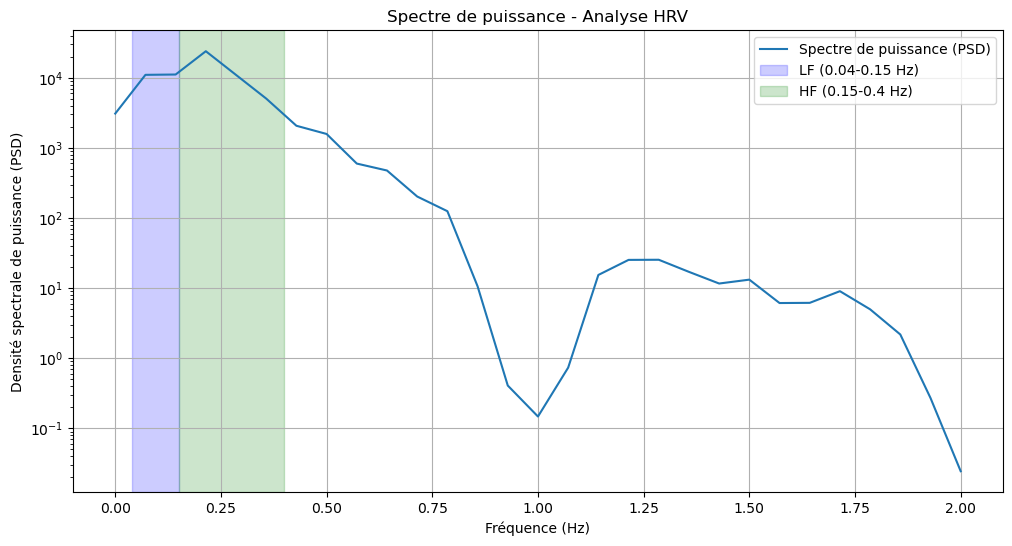

/Applications/anaconda3/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 112, using nperseg = 112
  warnings.warn('nperseg = {0:d} is greater than input length '


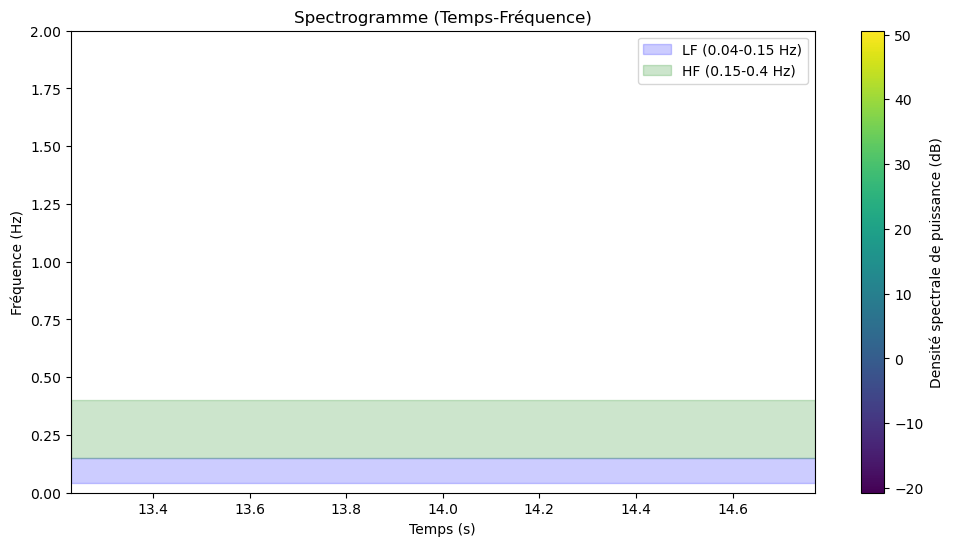

Résultats de l'analyse spectrale :
Total Power: 4916.2202
VLF Power: 0.0000
LF Power: 790.7460
HF Power: 1819.0590
LF Relative (%): 16.0844
HF Relative (%): 37.0012
LF/HF Ratio: 0.4347


In [18]:
import pandas as pd
import numpy as np
from scipy.signal import welch, spectrogram
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Charger les données depuis le fichier CSV
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/Py_Data_HRV - Data.csv'
hrv_data = pd.read_csv(file_path)

# Nettoyage des noms de colonnes
hrv_data.columns = hrv_data.columns.str.strip()

# Étape 1 : Extraire les intervalles RR
rr_intervals = hrv_data.loc[hrv_data['Date'] == 'Mean RR* (ms)'].iloc[0, 1:].astype(float).values

# Étape 2 : Interpolation pour uniformiser les données
fs = 4  # Fréquence d'échantillonnage (4 Hz)
time_index = np.linspace(0, len(rr_intervals) - 1, len(rr_intervals))
time_uniform = np.linspace(0, len(rr_intervals) - 1, int(len(rr_intervals) * fs))

# Interpolation linéaire
interpolator = interp1d(time_index, rr_intervals, kind='linear')
rr_interpolated = interpolator(time_uniform)

# Étape 3 : Analyse spectrale avec la méthode de Welch
f, psd = welch(rr_interpolated, fs=fs, nperseg=len(rr_interpolated) // 2)

# Étape 4 : Définir les bandes spectrales et calculer les puissances
vlf_band = (0.003, 0.04)
lf_band = (0.04, 0.15)
hf_band = (0.15, 0.4)

# Calculer les puissances dans chaque bande
total_power = np.trapz(psd, f)
vlf_power = np.trapz(psd[(f >= vlf_band[0]) & (f < vlf_band[1])], f[(f >= vlf_band[0]) & (f < vlf_band[1])])
lf_power = np.trapz(psd[(f >= lf_band[0]) & (f < lf_band[1])], f[(f >= lf_band[0]) & (f < lf_band[1])])
hf_power = np.trapz(psd[(f >= hf_band[0]) & (f < hf_band[1])], f[(f >= hf_band[0]) & (f < hf_band[1])])

# Calculer les pourcentages relatifs et les puissances normalisées
lf_relative = (lf_power / total_power) * 100 if total_power > 0 else 0
hf_relative = (hf_power / total_power) * 100 if total_power > 0 else 0
lf_hf_ratio = lf_power / hf_power if hf_power > 0 else np.inf

# Étape 5 : Visualisation des résultats
# Spectre de puissance
plt.figure(figsize=(12, 6))
plt.semilogy(f, psd, label='Spectre de puissance (PSD)')
plt.axvspan(lf_band[0], lf_band[1], color='blue', alpha=0.2, label='LF (0.04-0.15 Hz)')
plt.axvspan(hf_band[0], hf_band[1], color='green', alpha=0.2, label='HF (0.15-0.4 Hz)')
plt.title('Spectre de puissance - Analyse HRV')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Densité spectrale de puissance (PSD)')
plt.legend()
plt.grid()
plt.show()

# Spectrogramme
frequencies, times, Sxx = spectrogram(rr_interpolated, fs=fs, nperseg=256)
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Densité spectrale de puissance (dB)')
plt.title('Spectrogramme (Temps-Fréquence)')
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.axhspan(lf_band[0], lf_band[1], color='blue', alpha=0.2, label='LF (0.04-0.15 Hz)')
plt.axhspan(hf_band[0], hf_band[1], color='green', alpha=0.2, label='HF (0.15-0.4 Hz)')
plt.legend()
plt.show()

# Afficher les résultats sous forme de texte
results = {
    "Total Power": total_power,
    "VLF Power": vlf_power,
    "LF Power": lf_power,
    "HF Power": hf_power,
    "LF Relative (%)": lf_relative,
    "HF Relative (%)": hf_relative,
    "LF/HF Ratio": lf_hf_ratio
}

# Affichage des résultats
print("Résultats de l'analyse spectrale :")
for key, value in results.items():
    print(f"{key}: {value:.4f}")



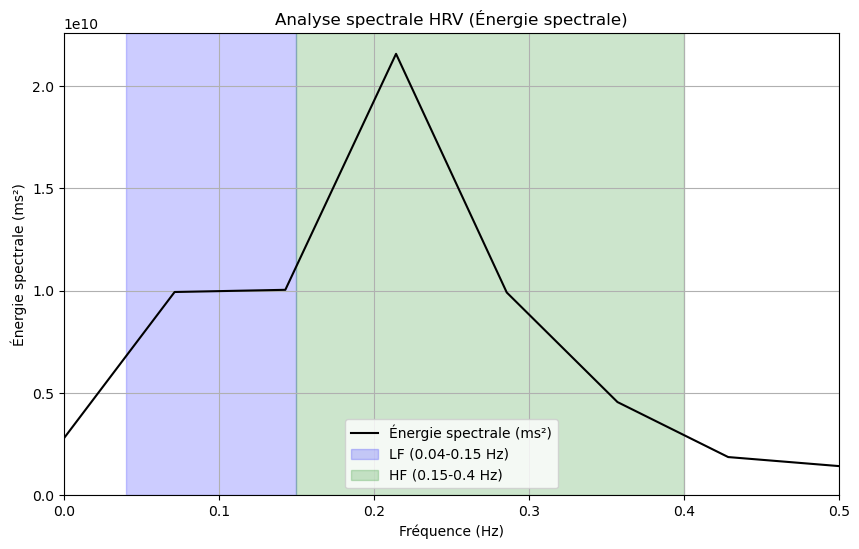

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Adapter l'analyse spectrale pour correspondre au style attendu
# Étape 1 : Recalculer l'énergie spectrale (ms²)
energy_psd = psd * (np.mean(rr_intervals) ** 2)  # Adapter pour l'énergie spectrale en ms²

# Étape 2 : Limiter la plage de fréquences à 0–0.5 Hz
freq_limit = f <= 0.5
f_limited = f[freq_limit]
energy_psd_limited = energy_psd[freq_limit]

# Étape 3 : Reproduire un graphique similaire
plt.figure(figsize=(10, 6))
plt.plot(f_limited, energy_psd_limited, label='Énergie spectrale (ms²)', color='black')
plt.axvspan(lf_band[0], lf_band[1], color='blue', alpha=0.2, label='LF (0.04-0.15 Hz)')
plt.axvspan(hf_band[0], hf_band[1], color='green', alpha=0.2, label='HF (0.15-0.4 Hz)')

# Ajouter des titres et étiquettes pour correspondre à l'exemple
plt.title("Analyse spectrale HRV (Énergie spectrale)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Énergie spectrale (ms²)")
plt.legend()
plt.grid()
plt.xlim([0, 0.5])
plt.ylim(bottom=0)
plt.show()
